<a href="https://colab.research.google.com/github/balezz/modern_dl/blob/main/KerasModelClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Model class

In [1]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt

### 1. Functional API

In [2]:
input = K.layers.Input(shape=(3,))
hidden = K.layers.Dense(4)(input)
out = K.layers.Dense(5, activation='softmax')(hidden)
model = K.Model(inputs=input, outputs=out)

In [ ]:
x = tf.ones((1, 3))
print(model(x))

tf.Tensor([[0.17497057 0.11796326 0.14159167 0.10496718 0.46050727]], shape=(1, 5), dtype=float32)


### 2. Subclassing the Model class

In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)

  def call(self, inputs):
    x = self.dense1(inputs)
    return self.dense2(x)

model = MyModel()

In [ ]:
x = tf.ones((1, 3))
print(model(x))

tf.Tensor([[0.01118665 0.03740396 0.16369443 0.6117687  0.1759462 ]], shape=(1, 5), dtype=float32)


If you subclass Model, you can optionally have a training argument (boolean) in call, which you can use to specify a different behavior in training and inference:

In [ ]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(4, activation=tf.nn.relu)
    self.dense2 = tf.keras.layers.Dense(5, activation=tf.nn.softmax)
    self.dropout = tf.keras.layers.Dropout(0.5)

  def call(self, inputs, training=False):
    x = self.dense1(inputs)
    if training:
      x = self.dropout(x, training=training)
    return self.dense2(x)

model = MyModel()

# Summary method

In [ ]:
# works only one time after instanciate
model.build(input_shape=(2, 5))

model.summary()

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              multiple                  24        
_________________________________________________________________
dense_5 (Dense)              multiple                  25        
_________________________________________________________________
dropout (Dropout)            multiple                  0 (unused)
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


# get_layer method

(array([4., 3., 2., 1., 1., 2., 1., 2., 1., 3.]),
 array([-0.8120473 , -0.6541584 , -0.49626952, -0.3383806 , -0.18049172,
        -0.02260283,  0.13528606,  0.29317495,  0.45106387,  0.60895276,
         0.76684165], dtype=float32),
 <a list of 10 Patch objects>)

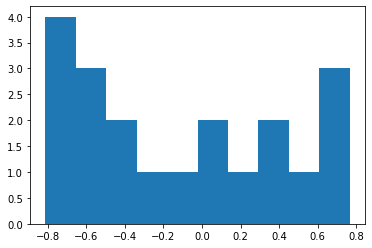

In [ ]:
layer = model.get_layer('dense_4')
W, B = model.dense1.get_weights()
plt.hist(W.ravel())

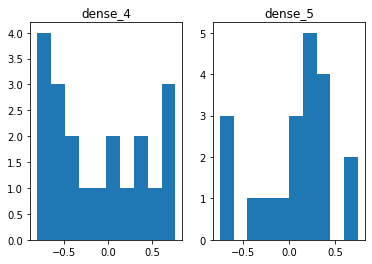

In [ ]:
layer_names = ['dense_4', 'dense_5']

fig, axs = plt.subplots(1, len(layer_names))

for i, name in enumerate(layer_names):
  weights = model.get_layer(name).get_weights()[0].ravel()
  axs[i].hist(weights)
  axs[i].set_title(layer_names[i])

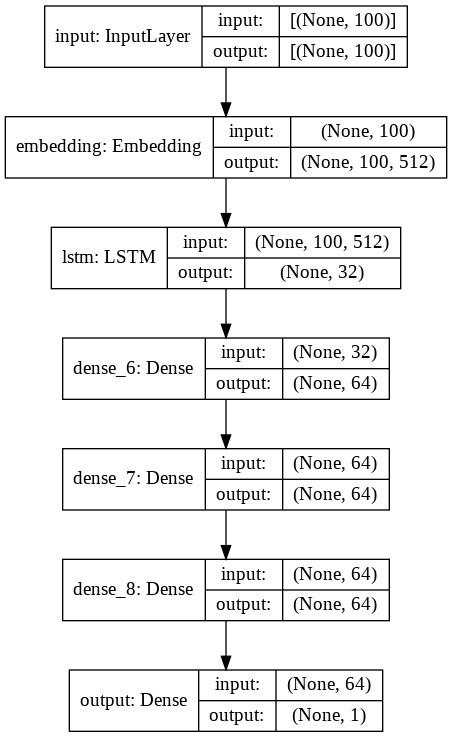

In [ ]:
input = tf.keras.Input(shape=(100,), dtype='int32', name='input')
x = tf.keras.layers.Embedding(
    output_dim=512, input_dim=10000, input_length=100)(input)
x = tf.keras.layers.LSTM(32)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
output = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(x)
model = tf.keras.Model(inputs=[input], outputs=[output])
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)